# 11-8 scikit-learn 中的 RBF 核

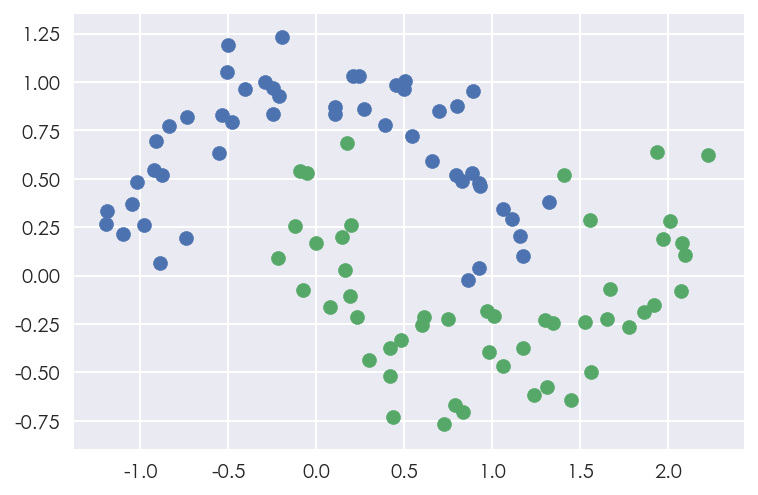

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['font.sans-serif'] = ['STHeiti']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

from sklearn import datasets

X, y = datasets.make_moons(noise=0.15, random_state=666)
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

## 使用高斯核函数的 SVM 分类模型

In [2]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


def RBFKernelSVC(gamma):
    return Pipeline([
        ('std', StandardScaler()),
        ('svc', SVC(kernel='rbf', gamma=gamma))
    ])

In [3]:
svc = RBFKernelSVC(gamma=1)
svc.fit(X, y)

Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [4]:
def plot_decision_boundary(model, axis):

    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int(
            (axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int(
            (axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])

    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

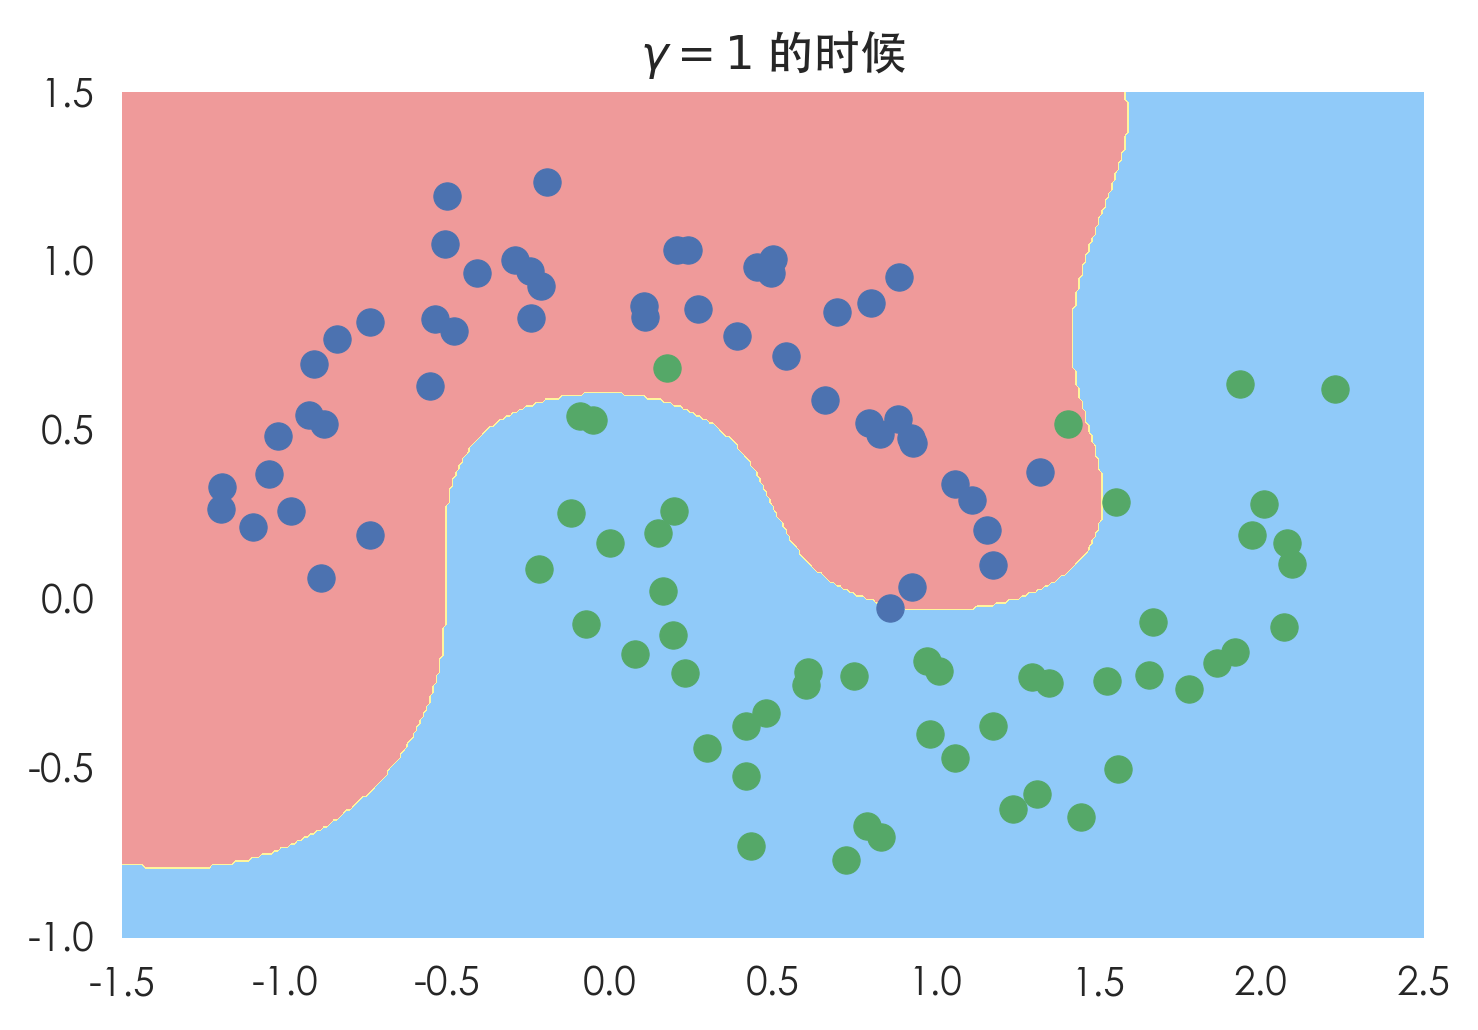

In [14]:
plt.figure(dpi=140)
plt.title("$\gamma=1$ 的时候")
plot_decision_boundary(svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

### gamma 的理解
$\gamma$ 与高斯函数中的 $\sigma$ 互为倒数，$\gamma$ 越大，$\sigma$ 标准差越小，则其中一类的边界就小，模型就越复杂，容易过拟合。

In [6]:
svc_gamma100 = RBFKernelSVC(gamma=100)
svc_gamma100.fit(X, y)

Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

$\gamma$ 比较大的时候，说明，方差小，所以容易过拟合

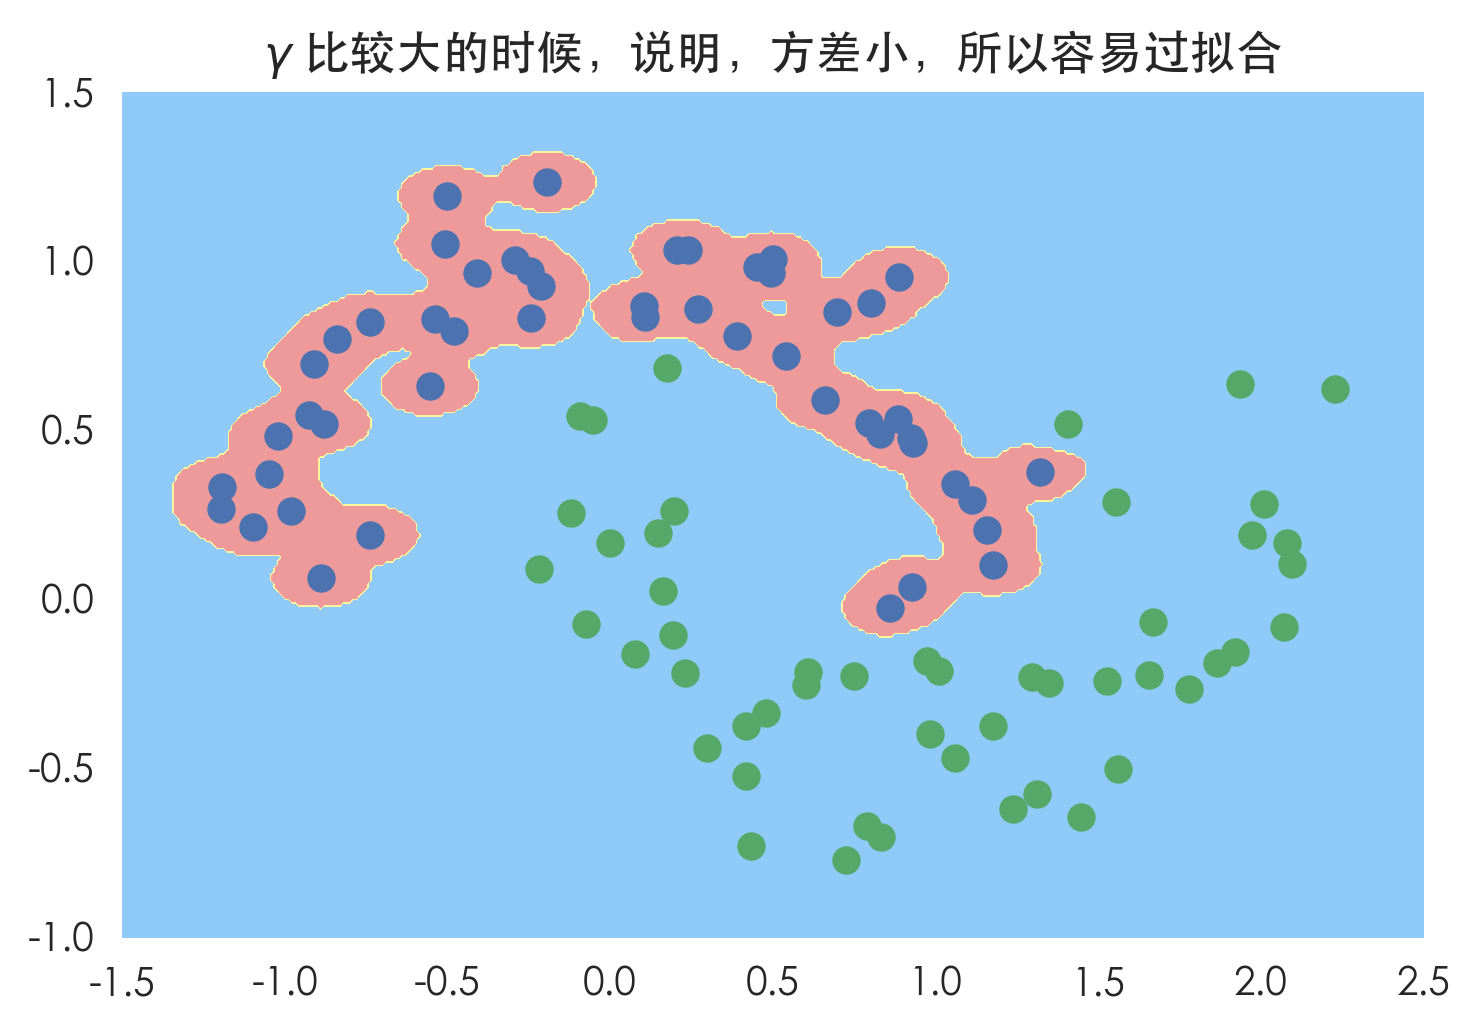

In [7]:
plt.figure(dpi=140)
plt.title('$\gamma$ 比较大的时候，说明，方差小，所以容易过拟合')
plot_decision_boundary(svc_gamma100, axis=[-1.5, 2.5, -1.0, 1.5])

plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

+ gamma = 10 的时候

In [8]:
svc_gamma10 = RBFKernelSVC(gamma=10)
svc_gamma10.fit(X, y)

Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

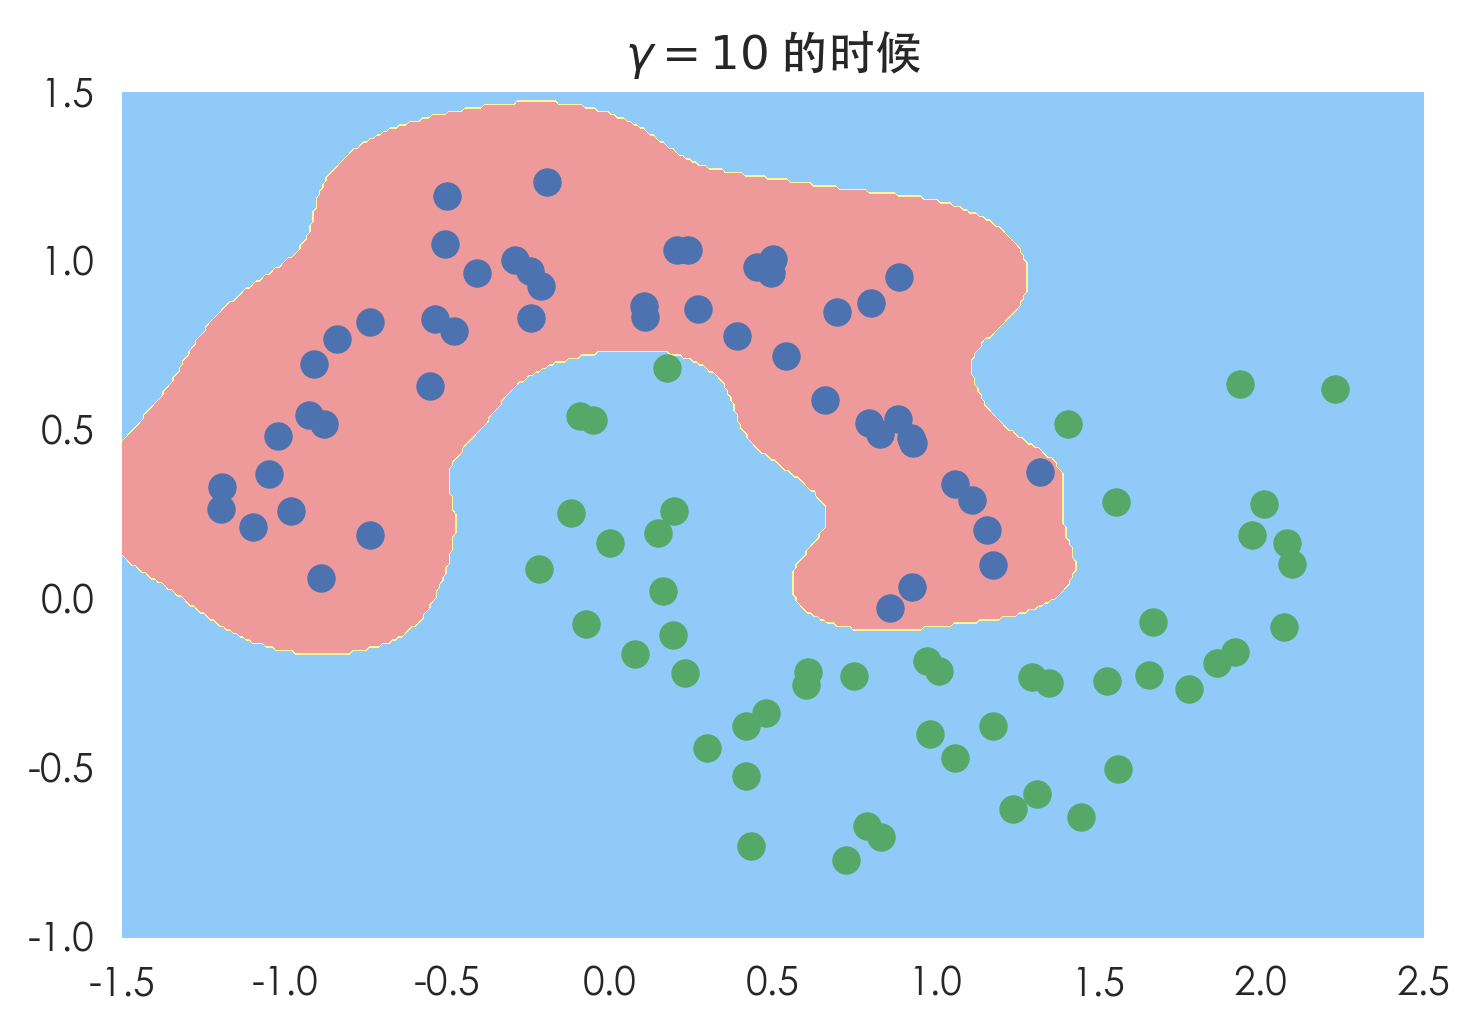

In [15]:
plt.figure(dpi=140)
plt.title("$\gamma=10$ 的时候")
plot_decision_boundary(svc_gamma10, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

+ gamma = 0.5 的时候，模型变得越来越简单

In [10]:
svc_gamma05 = RBFKernelSVC(gamma=0.5)
svc_gamma05.fit(X, y)

Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

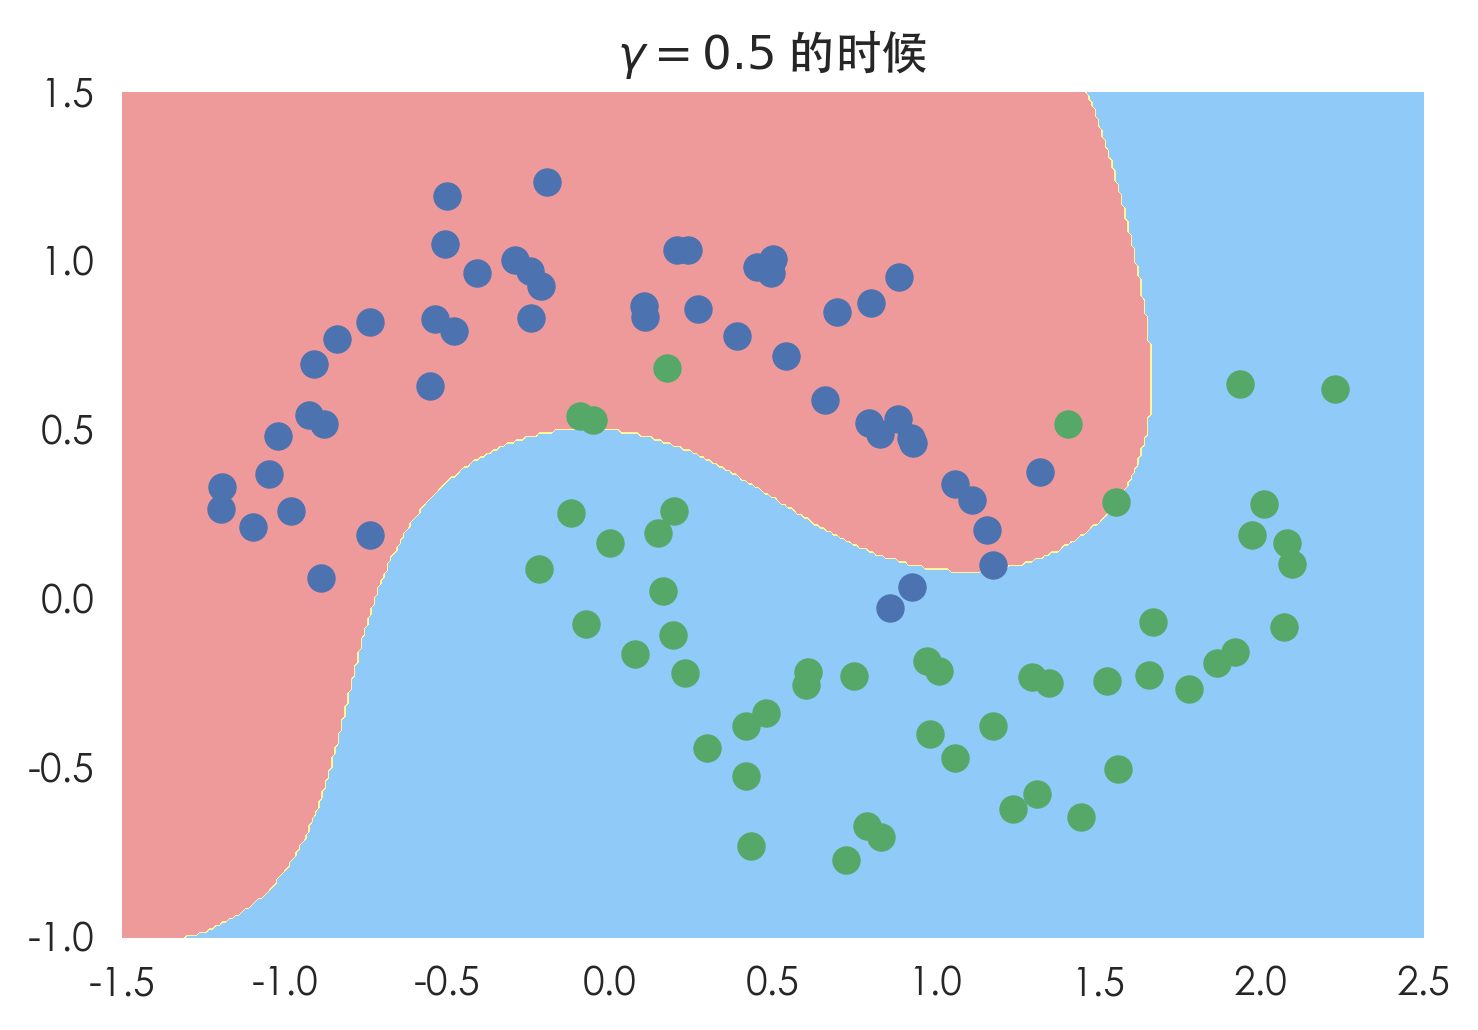

In [16]:
plt.figure(dpi=140)
plt.title("$\gamma=0.5$ 的时候")
plot_decision_boundary(svc_gamma05, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

+ gamma = 0.1 的时候，模型变得越来越简单，此时容易发生欠拟合

In [12]:
svc_gamma01 = RBFKernelSVC(gamma=0.1)
svc_gamma01.fit(X, y)

Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

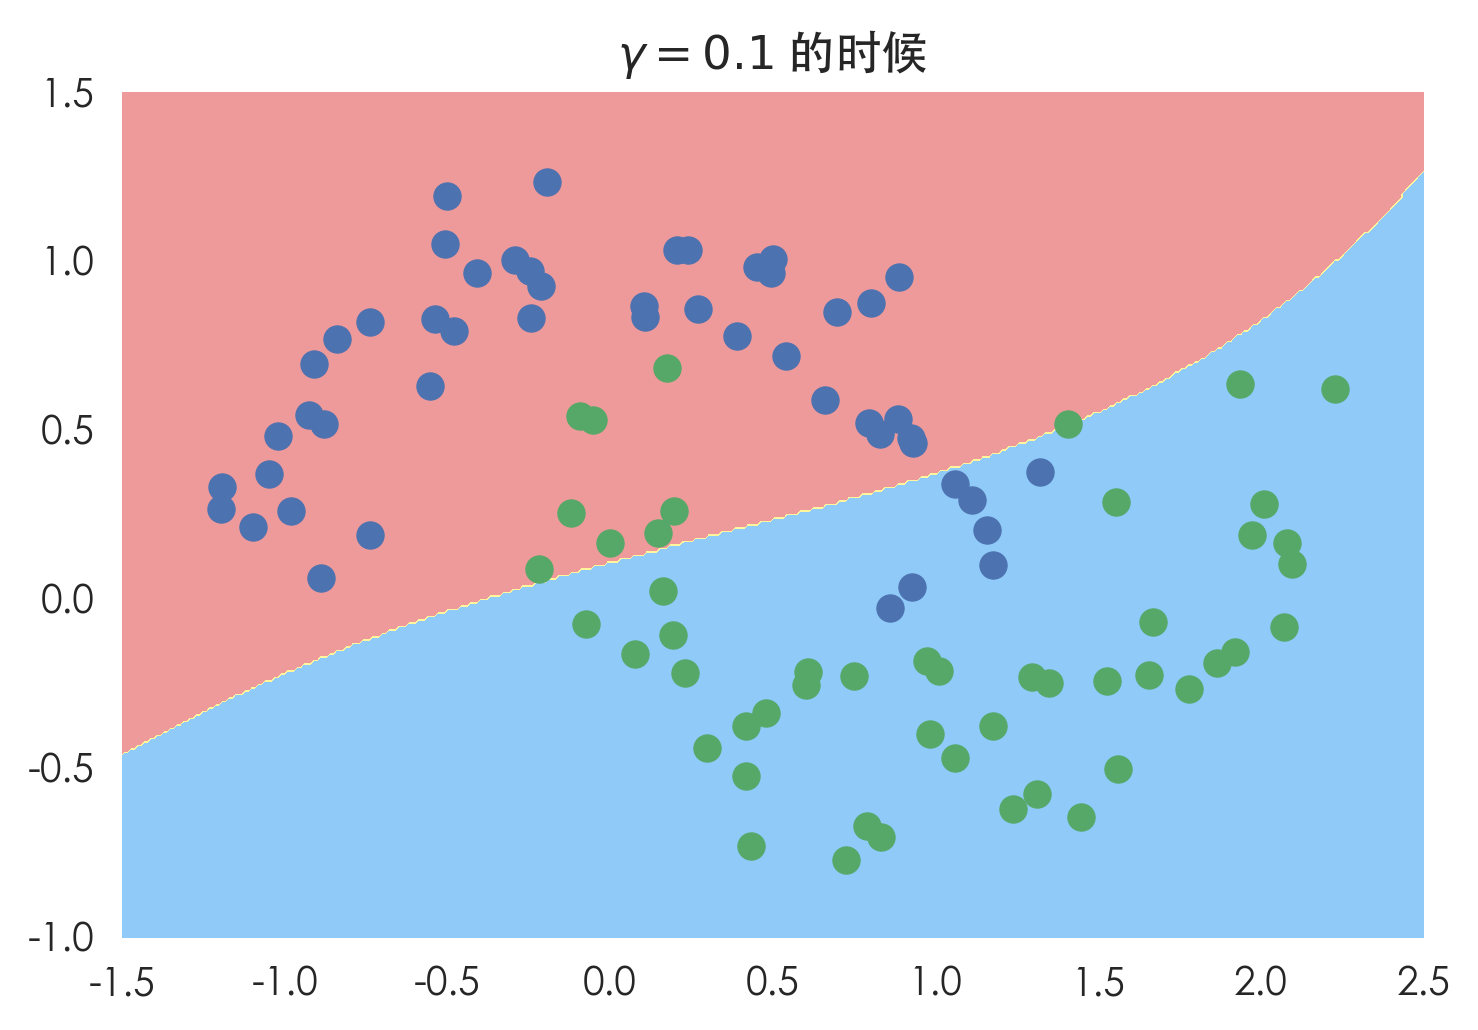

In [17]:
plt.figure(dpi=140)
plt.title("$\gamma=0.1$ 的时候")
plot_decision_boundary(svc_gamma01, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

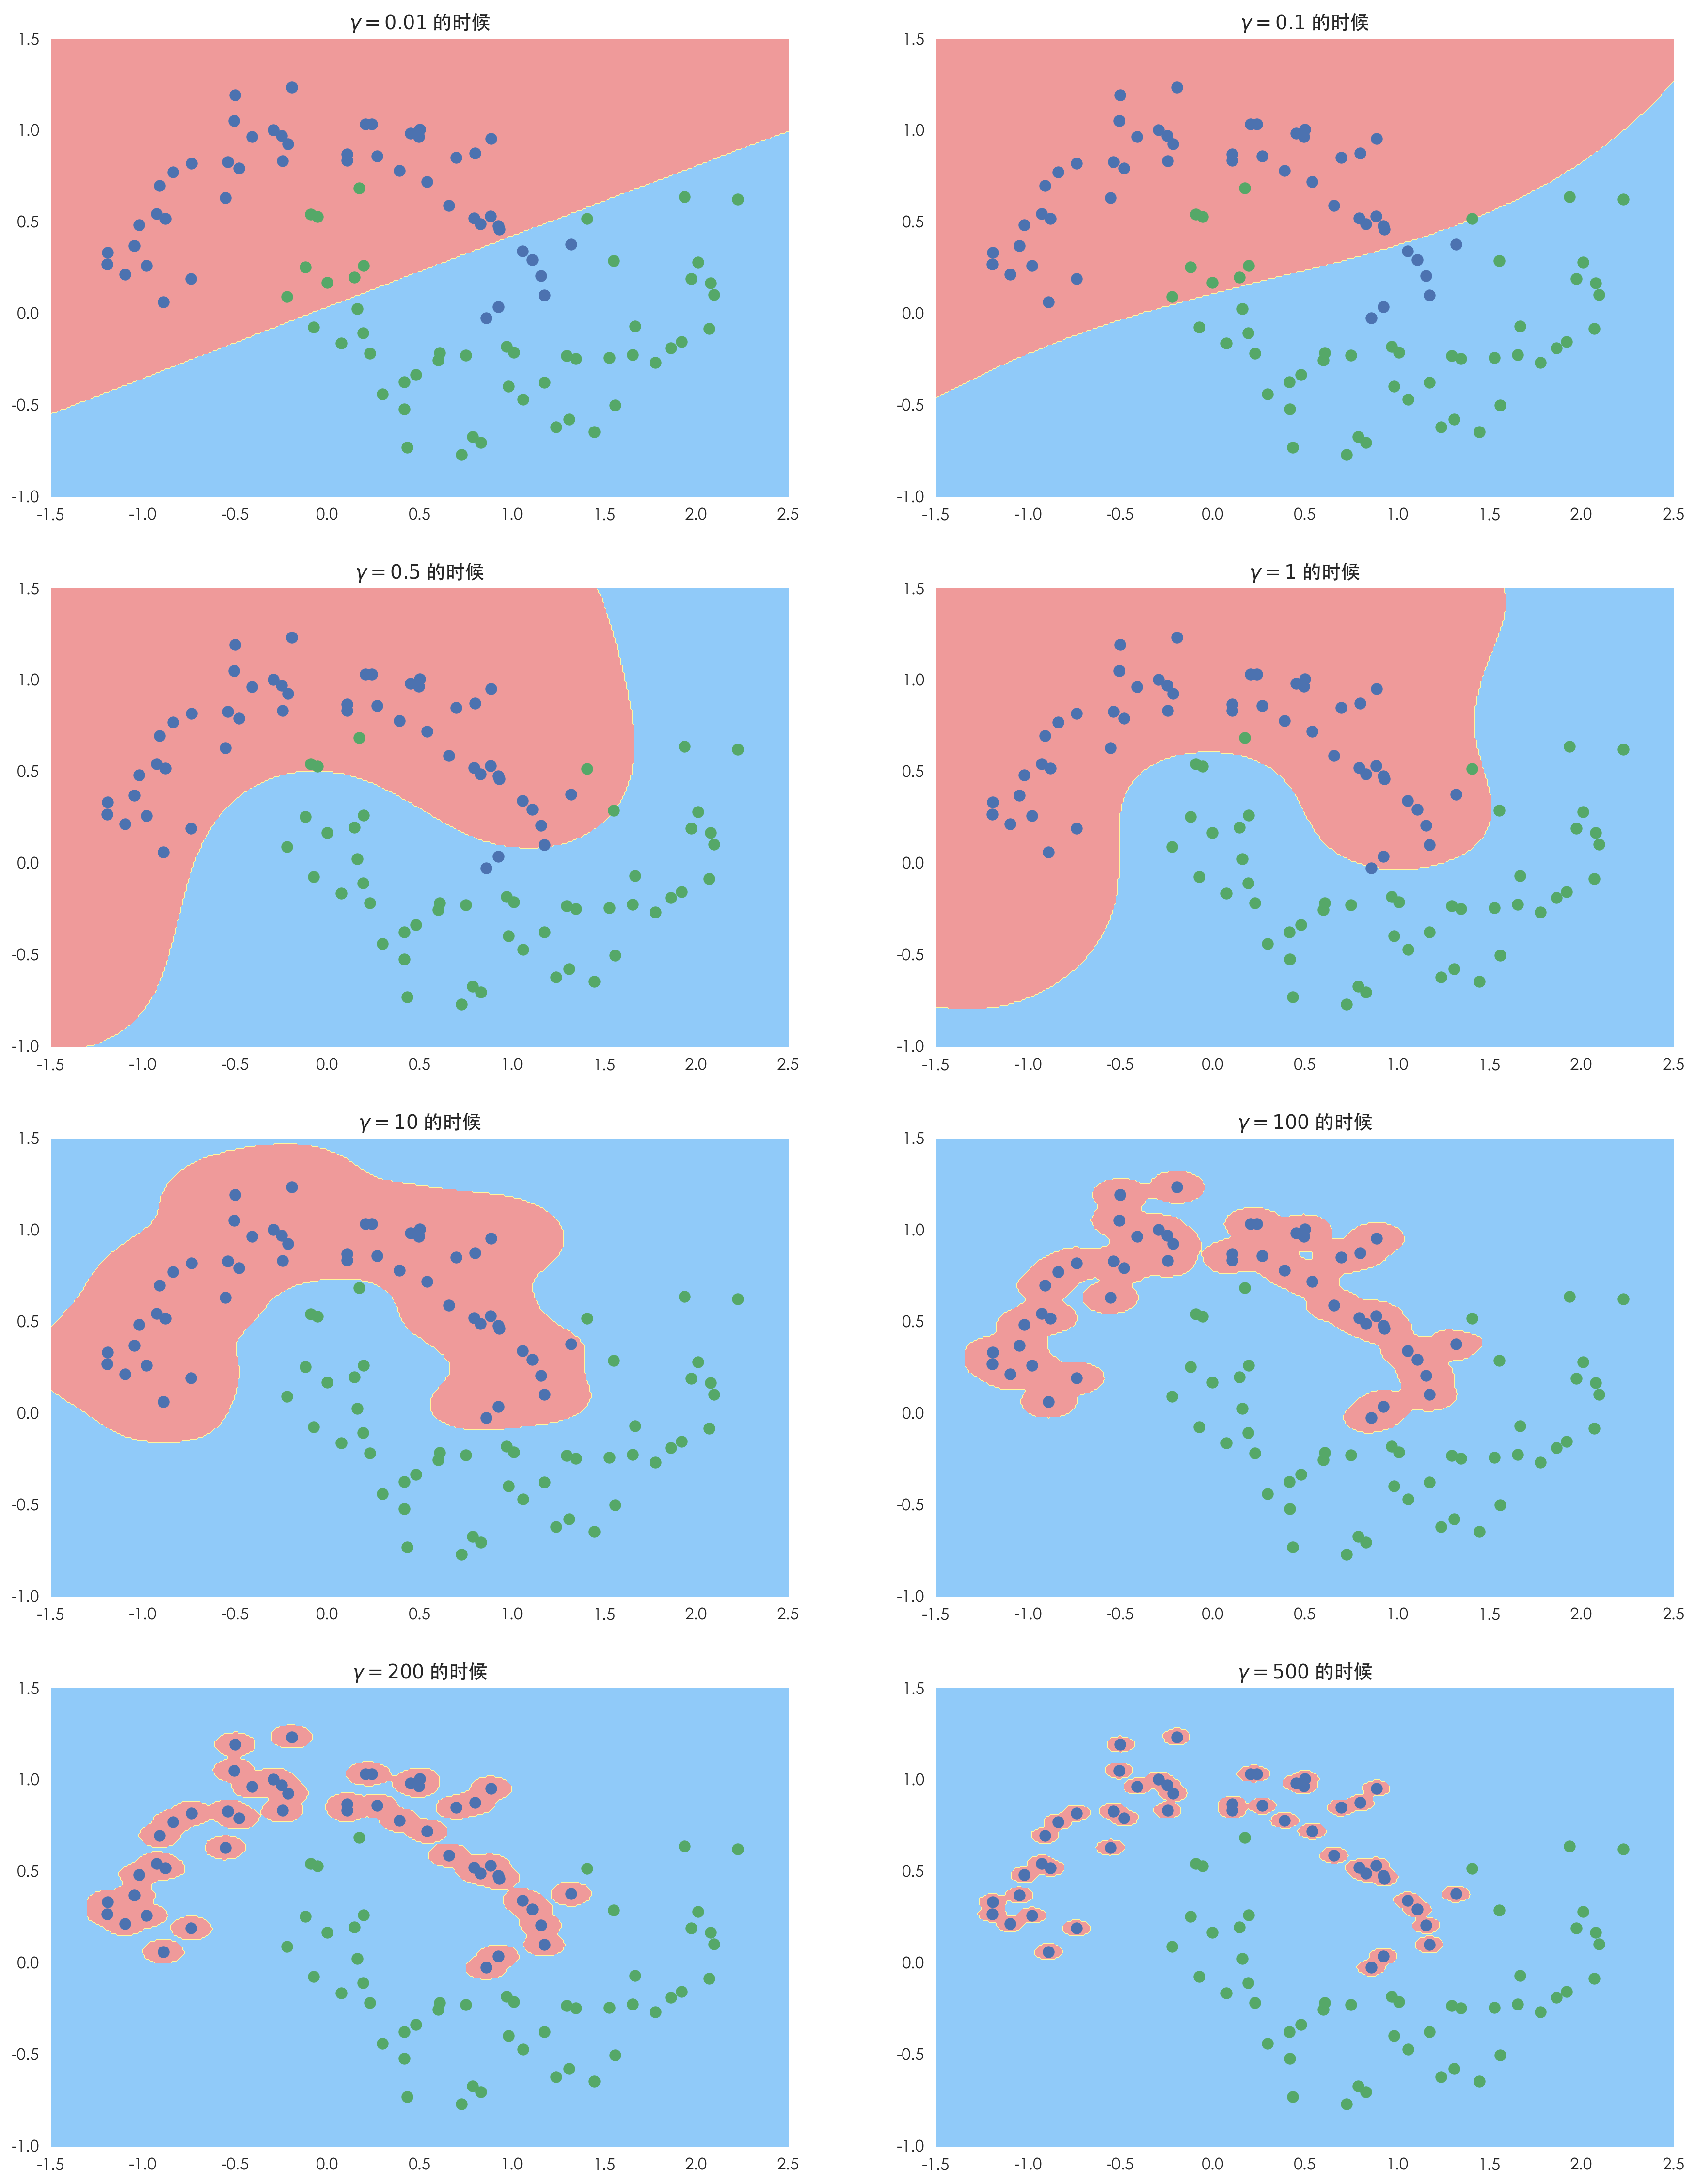

In [20]:
gamma_list = [0.01, 0.1, 0.5, 1, 10, 100, 200, 500]
plt.figure(figsize=(18, 24), dpi=120)
for index, gamma in enumerate(gamma_list):
    plt.subplot(4, 2, index + 1)
    plt.title("$\gamma=" + str(gamma) + "$ 的时候")

    svc = RBFKernelSVC(gamma=gamma)
    svc.fit(X, y)
    plot_decision_boundary(svc, axis=[-1.5, 2.5, -1.0, 1.5])
    plt.scatter(X[y == 0, 0], X[y == 0, 1])
    plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()